### Function to Approximate 
 $$ f_1(x) = sin(x),  \hspace{10 mm}     [0, \pi] $$
 $$ f_2(x) = cos(5x),  \hspace{10 mm}     [0, \frac{\pi}{2}] $$


In [9]:
import matplotlib.pyplot as plt
import math
import numpy as np
from time import time

plt.rcParams.update({'font.size': 16})
from matplotlib import rcParams
pi = math.pi
linestyles=['solid', 'dashed', 'dashdot', 'dotted']
colors = ['r', 'b', 'k']

 ###  Python Functions Used for Fourier Analysis 
 Vectorize $a_n$ and $b_n$ functions for $f_1(x)$

In [10]:
def a_n(n):
    try:
        a = (-1/pi)*( (1/(1-n))*((-1)**(n+1) - 1) + (1/(1+n))*((-1)**(n+1) - 1)       ) 
    except ZeroDivisionError:
        a = 0
    return a

def b_n(n):
    b = 0
    return b 

def fourier(a_coeff, b_coeff, x_input, interval_length, a_0=0, ):
    
    total = 0
    y_output = np.zeros(x_input.shape[0])
    coefficient_size = len(a_coeff)

    for counter, x in enumerate(x_input):
        # print('counter is:', counter, '\nx is: ', x, )

        for i in range(coefficient_size):
            total += a_coeff[i] * math.cos( ((i + 1) * x  * pi) / interval_length) + b_coeff[i] * math.sin( ((i + 1) * x * pi) / interval_length)
            
        y_output[counter] = (a_0/2) + total
        total = 0  # rest total
    return y_output

vector_a = np.vectorize(a_n)
vector_b = np.vectorize(b_n)

### Pure Analytic Function 

In [11]:
def f_1(x):  
    f = np.sin(x)
    return f

def f_2(x):
    f = np.cos(5*x)
    return f

 Define constants and $x$-domain space for  $$ f_1(x) = sin(x),  \hspace{10 mm}     [0, \pi] $$

In [12]:
interval_length = pi
a_0 = a_n(0)

x_start = 0
x_end = pi
x_domain = np.linspace(x_start, x_end, 1001)  # iterated x_domain from 0 to 2 
f_1_return = f_1(x_domain)

coefficients_to_plot = [4,8, 50]  # number terms in Fourier Series

## Fourier Approximate and Function Plot 
 $$ f_1(x) = sin(x),  \hspace{10 mm}     [0, \pi] $$

C:\Users\adamc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\adamc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


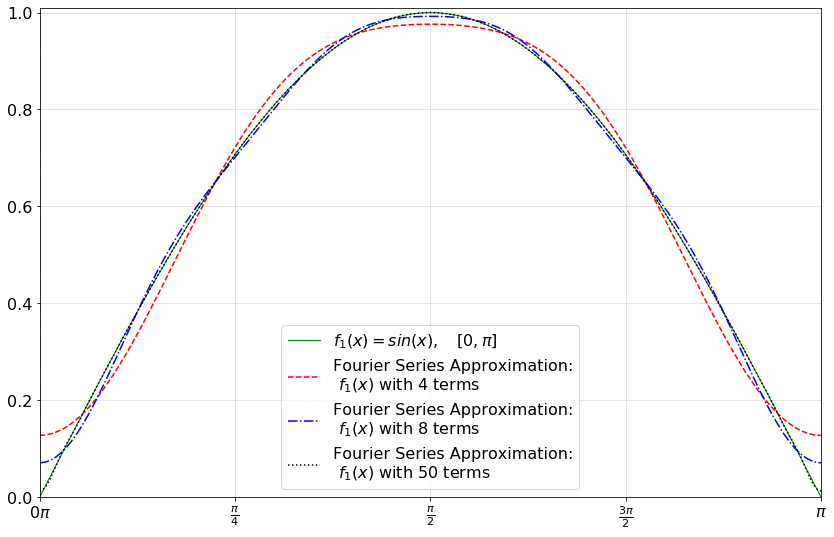

In [13]:
fig, ax = plt.subplots(ncols=1, figsize=(14, 9))
ax.set_ylim((0, 1.01))
ax.set_xlim((x_start, x_end))
ax.plot(x_domain, f_1_return, color='g',label=r'$f_1(x)= sin(x), \ \ \  [0, \pi]$',  linewidth=1)

for i, number_of_coeff in enumerate(coefficients_to_plot):
    
    n = np.arange(1,number_of_coeff + 1, 1, dtype=np.int32)
    a = vector_a(n)  #  terms are generated
    b = vector_b(n)
    y_estimates = fourier(a, b, x_domain,interval_length ,a_0)

    ax.plot(x_domain, y_estimates, color=colors[i], linewidth=1.5, linestyle=linestyles[i+1],label=f'Fourier Series Approximation:\n $f_1(x)$ with {number_of_coeff} terms'  )

ax.legend(loc=0)
ax.grid(linestyle='--', linewidth=0.5)
x_tick = [0, pi/4, pi/2, 3*pi/4, pi]
ax.set_xticks(x_tick)
ax.set_xticklabels([r'$0\pi$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{2}$', r'$\pi$'])  


plt.savefig('HW6_Problem_1.pdf', bbox_inches="tight")
plt.show()

 Define constants and $x$-domain space for 
 $$ f_2(x) = cos(5x),  \hspace{10 mm}     [0, \frac{\pi}{2}] $$

In [14]:
def a_n_f2(n):  # new definition of a_n : a_n for function 2
    a = (-20 * (-1)**n) / (pi*(4*n**2 - 25))
    return a

vector_a_f2 = np.vectorize(a_n_f2)

interval_length = pi/2
a_0 = a_n_f2(0)

x_start = 0
x_end = pi/2
x_domain = np.linspace(x_start, x_end, 1001)  # iterated x_domain from 0 to 2 
f_2_return = f_2(x_domain)

coefficients_to_plot = [4, 8, 50]  # number terms in Fourier Series

## Fourier Approximate and Function Plot 
 $$ f_2(x) = cos(5x),  \hspace{10 mm}     [0, \frac{\pi}{2}] $$

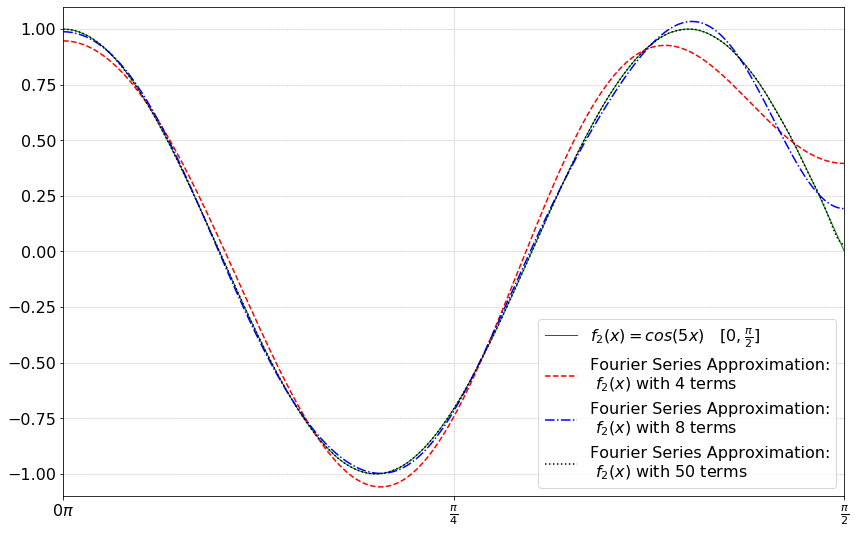

In [15]:
fig, ax = plt.subplots(ncols=1, figsize=(14, 9))
ax.set_ylim((-1.1, 1.1))
ax.set_xlim((x_start, x_end))
ax.plot(x_domain, f_2_return, color='g',label=r'$f_2(x) = cos(5x) \ \ \ [0, \frac{\pi}{2}] $',  linewidth=1)

for i, number_of_coeff in enumerate(coefficients_to_plot):
    
    n = np.arange(1,number_of_coeff + 1, 1, dtype=np.int32)
    a = vector_a_f2(n)  #  terms are generated
    b = vector_b(n)
 
    y_estimates = fourier(a, b, x_domain,interval_length ,a_0)

    ax.plot(x_domain, y_estimates, color=colors[i], linewidth=1.5, linestyle=linestyles[i+1],label=f'Fourier Series Approximation:\n $f_2(x)$ with {number_of_coeff} terms'  )

ax.legend(loc=0)
ax.grid(linestyle='--', linewidth=0.5)
x_tick = [0, pi/4, pi/2]
ax.set_xticks(x_tick)
ax.set_xticklabels([r'$0\pi$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$'])  


plt.savefig('HW6_Problem_1_d.pdf', bbox_inches="tight")
plt.show()